In [1]:
from pathlib import Path

import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
import torchvision
import cv2
import wandb
import matplotlib.pyplot as plt

In [10]:
# ds_root = Path('data/apple2orange/')
# ds_root = Path('data/horse2zebra/')
ds_root = Path('data/summer2winter_yosemite/')
train_a_path = ds_root / 'trainA'
test_a_path = ds_root / 'testA'
train_b_path = ds_root / 'trainB'
test_b_path = ds_root / 'testB'

In [11]:
def load_dataset(path: Path):
    images = [cv2.imread(str(ip))[:, :, ::-1] for ip in path.iterdir()]
    images = np.stack(images) / 255
    images = torch.FloatTensor(images)
    images = images.permute(0, 3, 1, 2)
    images = torchvision.transforms.functional.resize(images, [64, 64])
    return TensorDataset(images)

train_a_ds = load_dataset(train_a_path)
test_a_ds = load_dataset(test_a_path)
train_b_ds = load_dataset(train_b_path)
test_b_ds = load_dataset(test_b_path)

In [12]:
batch_size = 8
train_a_dl = DataLoader(train_a_ds, batch_size=batch_size, drop_last=True)
test_a_dl = DataLoader(test_a_ds, batch_size=batch_size, drop_last=True)
train_b_dl = DataLoader(train_b_ds, batch_size=batch_size, drop_last=True)
test_b_dl = DataLoader(test_b_ds, batch_size=batch_size, drop_last=True)

In [5]:
device = 'cuda:0'

In [6]:
import spa_gan

In [ ]:
wandb_run = wandb.init(project='gm_project', settings=wandb.Settings(_disable_stats=True))

In [15]:
sg_model = spa_gan.SPAGAN(lambda_fm=.1, lambda_rec=2.).to(device)
sg_model.train(train_a_dl, train_b_dl, test_a_dl, test_b_dl, 100, 1e-5, 1e-5)

  0%|          | 0/100 [00:00<?, ?it/s]

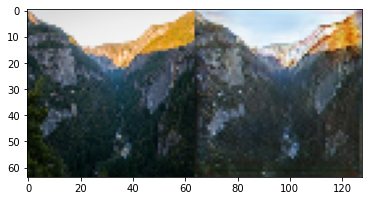

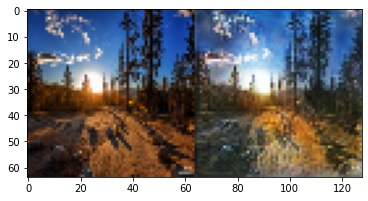

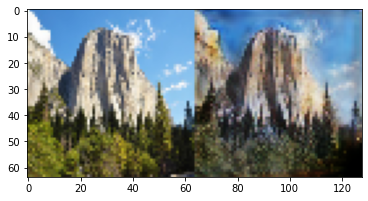

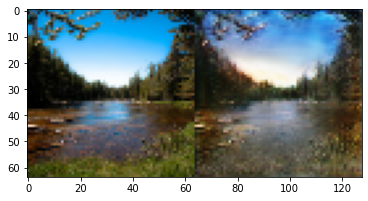

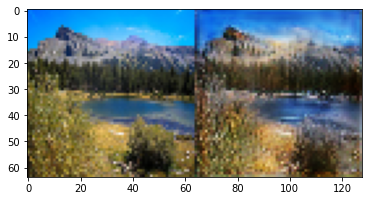

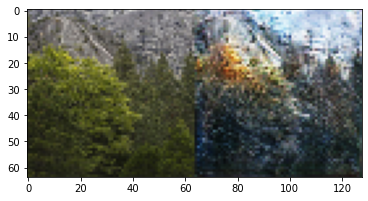

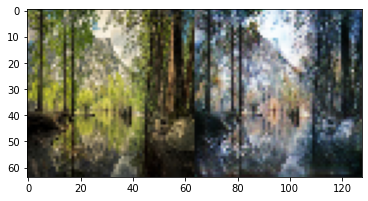

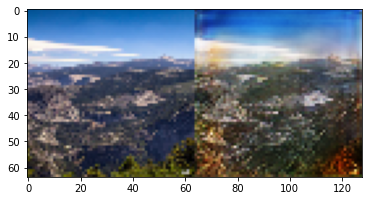

In [16]:
it = iter(test_a_dl)
for i in range(1):next(it)
batch = next(it)[0].cuda()

with torch.no_grad():
    batch_conv = sg_model.a2b(batch)
for i in torch.cat((batch, batch_conv), dim=3).cpu():
    plt.imshow(i.permute(1, 2, 0))
    plt.show()

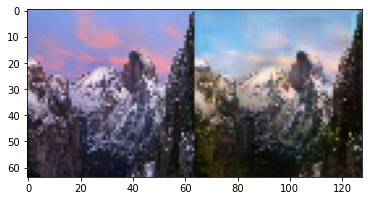

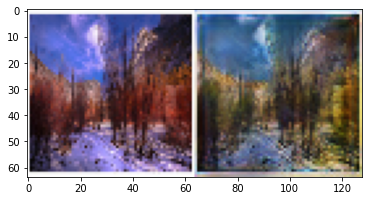

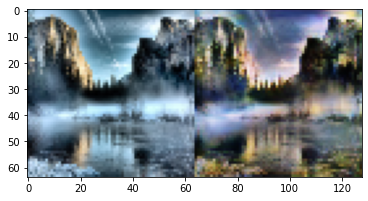

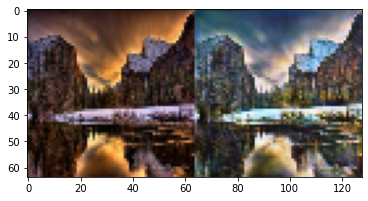

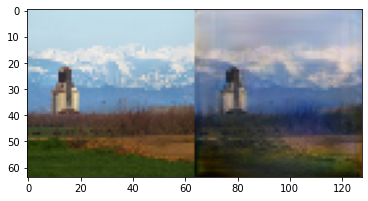

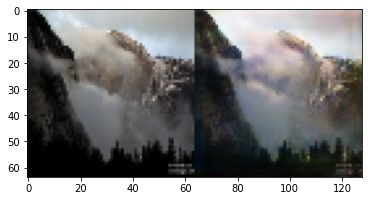

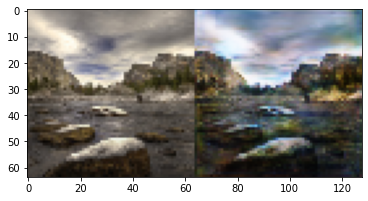

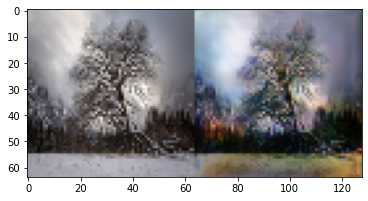

In [18]:
it = iter(test_b_dl)
for i in range(1):next(it)
batch = next(it)[0].cuda()

with torch.no_grad():
    batch_conv = sg_model.b2a(batch)
for i in torch.cat((batch, batch_conv), dim=3).cpu():
    plt.imshow(i.permute(1, 2, 0))
    plt.show()